In [23]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns

In [4]:
ruta = '../../data/processed_data/maestro/csv_maestro.csv'

df = pd.read_csv(ruta)

df.head()

,Código región,Región,Provincia,Código comuna,Comuna,total_poblacion,total_poblacion_migrante,porcentaje_migrante_total,porcentaje_migrante_fonasa,ruralidad,nivel_promedio,desviacion_estandar,Total_centros,promedio_pacientes,porcentaje_migrantes_promedio,Area,tasa_centros_10k,tasa_atenciones_10k,densidad_poblacional
0,1,Tarapacá,Iquique,1101,Iquique,199587.0,40655,20.37,27.01,0.022840,2.166559,0.634131,12.0,14768.083333,20.08,2262.0,0.60,739.93,88.23
1,1,Tarapacá,Iquique,1107,Alto Hospicio,142086.0,37628,26.48,25.83,0.012932,3.358875,2.930693,8.0,9143.833333,15.01,573.0,0.56,643.54,247.97
2,1,Tarapacá,Del Tamarugal,1401,Pozo Almonte,16878.0,3695,21.89,26.80,0.423503,4.423503,0.494114,5.0,1738.166667,12.82,13766.0,2.96,1029.84,1.23
3,1,Tarapacá,Del Tamarugal,1402,Camiña,1335.0,245,18.35,31.31,1.000000,4.000000,0.000000,3.0,413.916667,21.30,2200.0,22.47,3100.50,0.61
4,1,Tarapacá,Del Tamarugal,1403,Colchane,790.0,338,42.78,32.21,1.000000,1.000000,0.000000,5.0,331.250000,36.23,4016.0,63.29,4193.04,0.20


In [12]:
df[df["nivel_promedio"].isna()]

,Código región,Región,Provincia,Código comuna,Comuna,total_poblacion,total_poblacion_migrante,porcentaje_migrante_total,porcentaje_migrante_fonasa,ruralidad,nivel_promedio,desviacion_estandar,Total_centros,promedio_pacientes,porcentaje_migrantes_promedio,Area,tasa_centros_10k,tasa_atenciones_10k,densidad_poblacional
12,2,Antofagasta,El Loa,2202,Ollagüe,256.0,62,24.22,50.77,NaN,NaN,NaN,1.0,30.750000,0.27,2964.0,39.06,1201.17,0.09
43,5,Valparaíso,Valparaíso,5104,Juan Fernández,904.0,0,0.00,2.62,NaN,NaN,NaN,2.0,154.083333,0.76,148.0,22.12,1704.46,6.11
47,5,Valparaíso,Isla de Pascua,5201,Isla de Pascua,4800.0,182,3.79,8.59,NaN,NaN,NaN,1.0,453.416667,4.12,164.0,2.08,944.62,29.27
208,10,Los Lagos,Llanquihue,10103,Cochamó,4199.0,111,2.64,2.03,NaN,NaN,NaN,10.0,306.250000,0.71,3911.0,23.82,729.34,1.07
232,10,Los Lagos,Palena,10401,Chaitén,4025.0,110,2.73,5.08,NaN,NaN,NaN,11.0,917.833333,1.78,8471.0,27.33,2280.33,0.48
233,10,Los Lagos,Palena,10402,Futaleufú,3062.0,324,10.58,11.57,NaN,NaN,NaN,3.0,778.333333,0.71,1280.0,9.80,2541.91,2.39
234,10,Los Lagos,Palena,10403,Hualaihué,9480.0,155,1.64,1.81,NaN,NaN,NaN,6.0,1040.500000,0.70,2788.0,6.33,1097.57,3.40
235,10,Los Lagos,Palena,10404,Palena,1903.0,88,4.62,6.23,NaN,NaN,NaN,3.0,370.250000,0.05,2764.0,15.76,1945.61,0.69
240,11,Aysén del General Carlos Ibáñez del Campo,Aysén,11203,Guaitecas,1598.0,65,4.07,11.99,NaN,NaN,NaN,1.0,392.500000,3.16,620.6,6.26,2456.20,2.57
242,11,Aysén del General Carlos Ibáñez del Campo,Capitán Prat,11302,O'Higgins,647.0,0,0.00,13.33,NaN,NaN,NaN,1.0,209.000000,0.08,8182.5,15.46,3230.29,0.08


Se eliminó del análisis:
* Antofagasta:
  * Ollagüe
* Valparaiso:
  * Juan Fernández
  * Isla de Pascua
* Los Lagos:
  * Cochamó
  * Chaitén
  * Futaleufú
  * Hualaihué
  * Palena
* Aysen:
  * Guaitecas
  * O'Higgins
* Magallanes:
  * Antártica
  * Primavera

In [18]:
comunas = [2202, 5104, 5201, 10103, 10401, 10402, 10403, 10404, 11203, 11302, 12202, 12302]
df_filtrado = df[~df["Código comuna"].isin(comunas)]

In [21]:
# Variables independientes
X = df_filtrado[['porcentaje_migrante_total', 'tasa_centros_10k', 'porcentaje_migrante_fonasa',"densidad_poblacional","ruralidad","nivel_promedio"]]
X = sm.add_constant(X)  # agrega intercepto

# Variable dependiente
y = df_filtrado['tasa_atenciones_10k']

# Ajuste del modelo
modelo = sm.OLS(y, X).fit()
print(modelo.summary())

                             OLS Regression Results                            
Dep. Variable:     tasa_atenciones_10k   R-squared:                       0.563
Model:                             OLS   Adj. R-squared:                  0.555
Method:                  Least Squares   F-statistic:                     70.27
Date:                 Thu, 11 Dec 2025   Prob (F-statistic):           6.73e-56
Time:                         22:36:35   Log-Likelihood:                -2480.8
No. Observations:                  334   AIC:                             4976.
Df Residuals:                      327   BIC:                             5002.
Df Model:                            6                                         
Covariance Type:             nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const     

Correlación entre % población migrante y % beneficiarios migrantes FONASA: 0.876


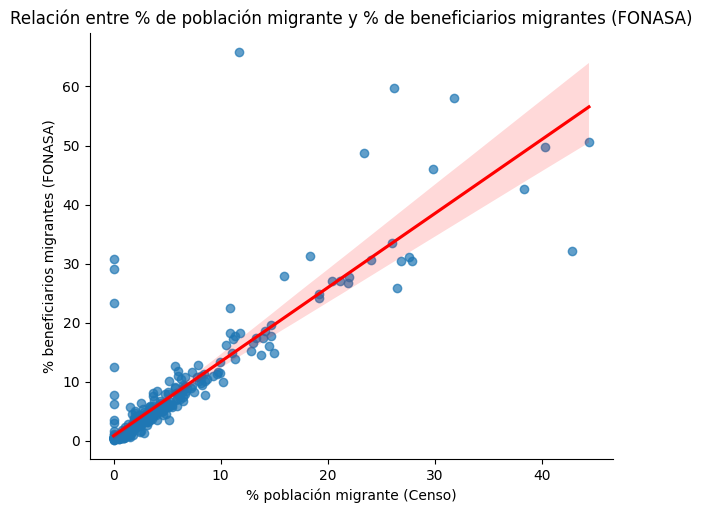

In [24]:
# Calcular correlación
corr = df_filtrado["porcentaje_migrante_total"].corr(df_filtrado["porcentaje_migrante_fonasa"])
print(f"Correlación entre % población migrante y % beneficiarios migrantes FONASA: {corr:.3f}")

# Visualizar
sns.lmplot(
    data=df_filtrado,
    x="porcentaje_migrante_total",
    y="porcentaje_migrante_fonasa",
    height=5,
    aspect=1.2,
    scatter_kws={"alpha": 0.7},
    line_kws={"color": "red"}
)
plt.title("Relación entre % de población migrante y % de beneficiarios migrantes (FONASA)")
plt.xlabel("% población migrante (Censo)")
plt.ylabel("% beneficiarios migrantes (FONASA)")
plt.show()

Correlación entre % población migrante y indice de ruralidad: -0.315


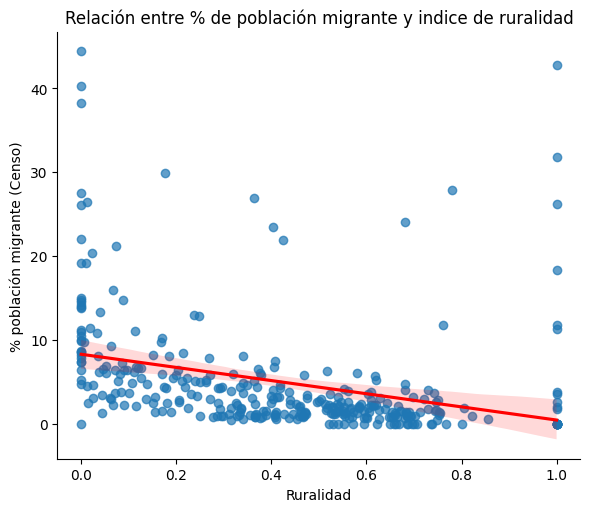

In [25]:
# Calcular correlación
corr = df_filtrado["ruralidad"].corr(df_filtrado["porcentaje_migrante_total"])
print(f"Correlación entre % población migrante y indice de ruralidad: {corr:.3f}")

# Visualizar
sns.lmplot(
    data=df_filtrado,
    x="ruralidad",
    y="porcentaje_migrante_total",
    height=5,
    aspect=1.2,
    scatter_kws={"alpha": 0.7},
    line_kws={"color": "red"}
)
plt.title("Relación entre % de población migrante y indice de ruralidad")
plt.xlabel("Ruralidad")
plt.ylabel("% población migrante (Censo)")
plt.show()

Correlación entre % población migrante y nivel promedio: 0.514


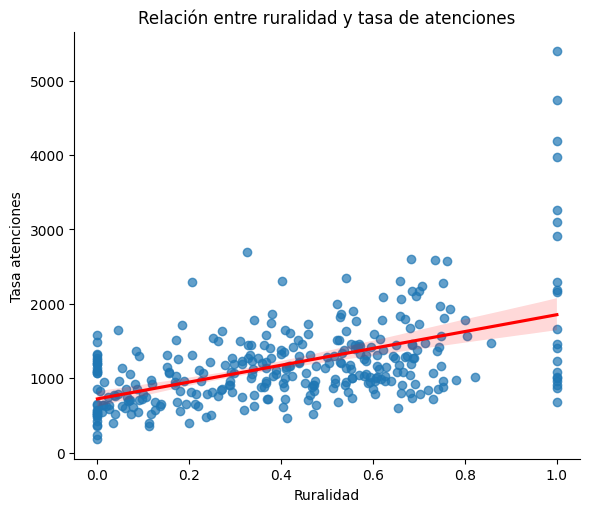

In [26]:
# Calcular correlación
corr = df_filtrado["ruralidad"].corr(df_filtrado["tasa_atenciones_10k"])
print(f"Correlación entre ruralidad y tasa de atenciones: {corr:.3f}")

# Visualizar
sns.lmplot(
    data=df_filtrado,
    x="ruralidad",
    y="tasa_atenciones_10k",
    height=5,
    aspect=1.2,
    scatter_kws={"alpha": 0.7},
    line_kws={"color": "red"}
)
plt.title("Relación entre ruralidad y tasa de atenciones")
plt.xlabel("Ruralidad")
plt.ylabel("Tasa atenciones")
plt.show()

Correlación entre % población migrante y % atencion migrante: 0.876


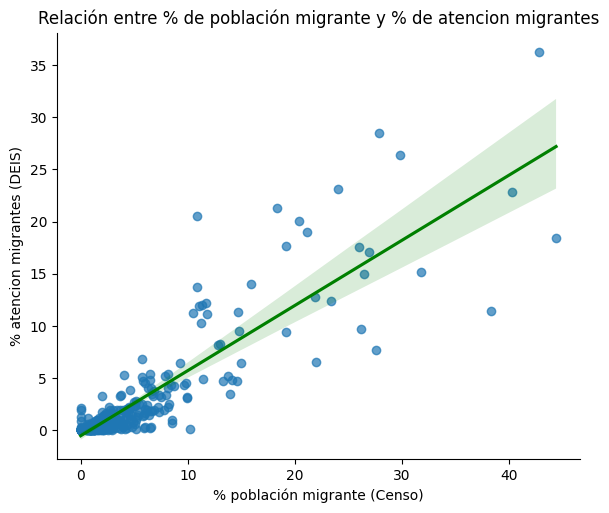

In [28]:
# Calcular correlación
corr = df_filtrado["porcentaje_migrante_total"].corr(df_filtrado["porcentaje_migrantes_promedio"])
print(f"Correlación entre % población migrante y % atencion migrante: {corr:.3f}")

# Visualizar
sns.lmplot(
    data=df_filtrado,
    x="porcentaje_migrante_total",
    y="porcentaje_migrantes_promedio",
    height=5,
    aspect=1.2,
    scatter_kws={"alpha": 0.7},
    line_kws={"color": "green"}
)
plt.title("Relación entre % de población migrante y % de atencion migrantes")
plt.xlabel("% población migrante (Censo)")
plt.ylabel("% atencion migrantes (DEIS)")
plt.show()

In [32]:
# Variables independientes
X = df_filtrado[['porcentaje_migrante_total', 'tasa_centros_10k',"ruralidad"]]
X = sm.add_constant(X)  # agrega intercepto

# Variable dependiente
y = df_filtrado['tasa_atenciones_10k']

# Ajuste del modelo
modelo = sm.OLS(y, X).fit()
print(modelo.summary())

                             OLS Regression Results                            
Dep. Variable:     tasa_atenciones_10k   R-squared:                       0.557
Model:                             OLS   Adj. R-squared:                  0.553
Method:                  Least Squares   F-statistic:                     138.4
Date:                 Thu, 11 Dec 2025   Prob (F-statistic):           4.78e-58
Time:                         22:56:15   Log-Likelihood:                -2483.1
No. Observations:                  334   AIC:                             4974.
Df Residuals:                      330   BIC:                             4989.
Df Model:                            3                                         
Covariance Type:             nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const       

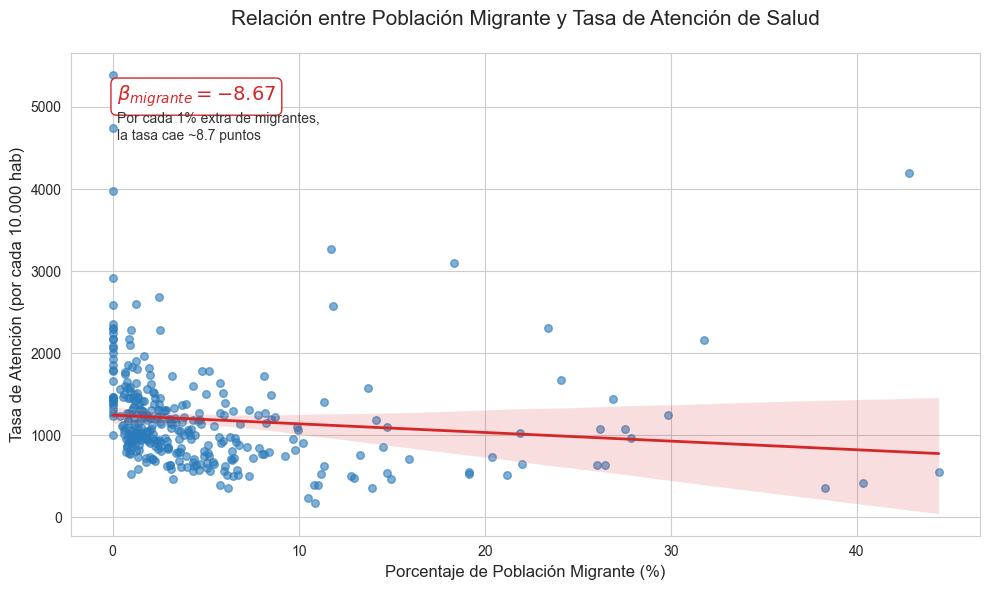

In [22]:
# Configuración estética
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))

# 1. Crear el gráfico de dispersión con línea de regresión
# scatter_kws: controla la transparencia y color de los puntos
# line_kws: controla el color y grosor de la línea roja
sns.regplot(x='porcentaje', 
            y='tasa_atencion_10000_hab', 
            data=df_merged, 
            scatter_kws={'alpha': 0.6, 'color': '#2b7bba', 's': 30},
            line_kws={'color': '#d62728', 'linewidth': 2})

# 2. Títulos y etiquetas
plt.title('Relación entre Población Migrante y Tasa de Atención de Salud', fontsize=15, pad=20)
plt.xlabel('Porcentaje de Población Migrante (%)', fontsize=12)
plt.ylabel('Tasa de Atención (por cada 10.000 hab)', fontsize=12)

# 3. (Opcional) Agregar un texto con el resultado de tu modelo
# Esto ayuda a quien mira el gráfico a entender la conclusión matemática
plt.annotate(r'$\beta_{migrante} = -8.67$', 
             xy=(0.05, 0.9), xycoords='axes fraction',
             fontsize=14, color='#d62728', weight='bold',
             bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="#d62728", lw=1))

plt.annotate('Por cada 1% extra de migrantes,\nla tasa cae ~8.7 puntos', 
             xy=(0.05, 0.82), xycoords='axes fraction',
             fontsize=10, color='#333333')

plt.tight_layout()
plt.show()

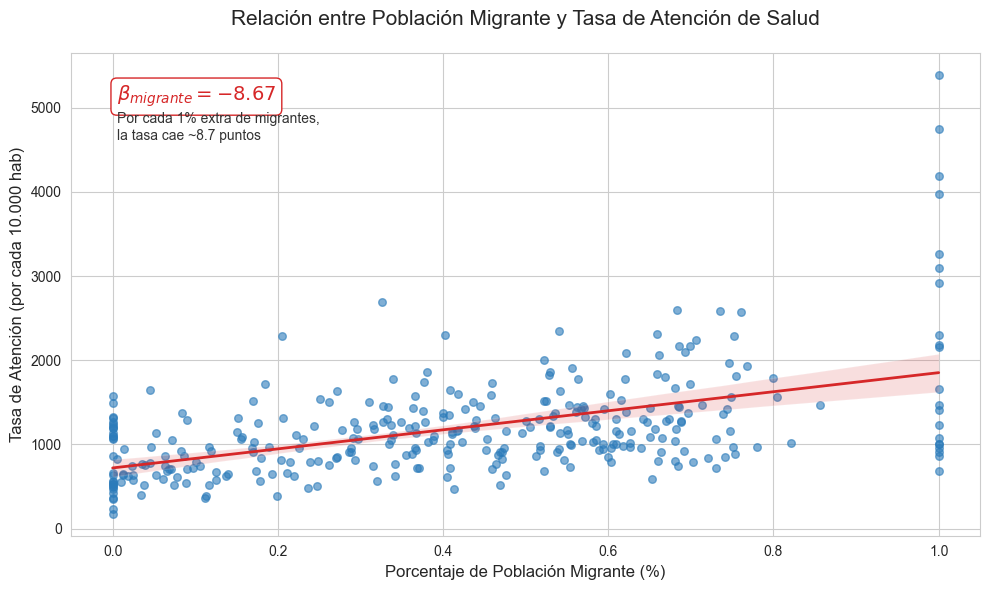

In [23]:
# Configuración estética
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))

# 1. Crear el gráfico de dispersión con línea de regresión
# scatter_kws: controla la transparencia y color de los puntos
# line_kws: controla el color y grosor de la línea roja
sns.regplot(x='ruralidad', 
            y='tasa_atencion_10000_hab', 
            data=df_merged, 
            scatter_kws={'alpha': 0.6, 'color': '#2b7bba', 's': 30},
            line_kws={'color': '#d62728', 'linewidth': 2})

# 2. Títulos y etiquetas
plt.title('Relación entre Población Migrante y Tasa de Atención de Salud', fontsize=15, pad=20)
plt.xlabel('Porcentaje de Población Migrante (%)', fontsize=12)
plt.ylabel('Tasa de Atención (por cada 10.000 hab)', fontsize=12)

# 3. (Opcional) Agregar un texto con el resultado de tu modelo
# Esto ayuda a quien mira el gráfico a entender la conclusión matemática
plt.annotate(r'$\beta_{migrante} = -8.67$', 
             xy=(0.05, 0.9), xycoords='axes fraction',
             fontsize=14, color='#d62728', weight='bold',
             bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="#d62728", lw=1))

plt.annotate('Por cada 1% extra de migrantes,\nla tasa cae ~8.7 puntos', 
             xy=(0.05, 0.82), xycoords='axes fraction',
             fontsize=10, color='#333333')

plt.tight_layout()
plt.show()

In [27]:
df_merged.rename(columns={
    'tasa_atencion_10000_hab': 'Atenciones por 10.000',
    'porcentaje': 'Porcentaje de poblacion migrante',
    'porcentaje_migrantes_promedio': 'Porcentaje migrante de FONASA',
    'centros_por_10000_hab':'Centros por 10.000 habitantes',
    'ruralidad':'Indice de ruralidad',
    'densidad_poblacional':'Densidad poblacional'
}, inplace=True)

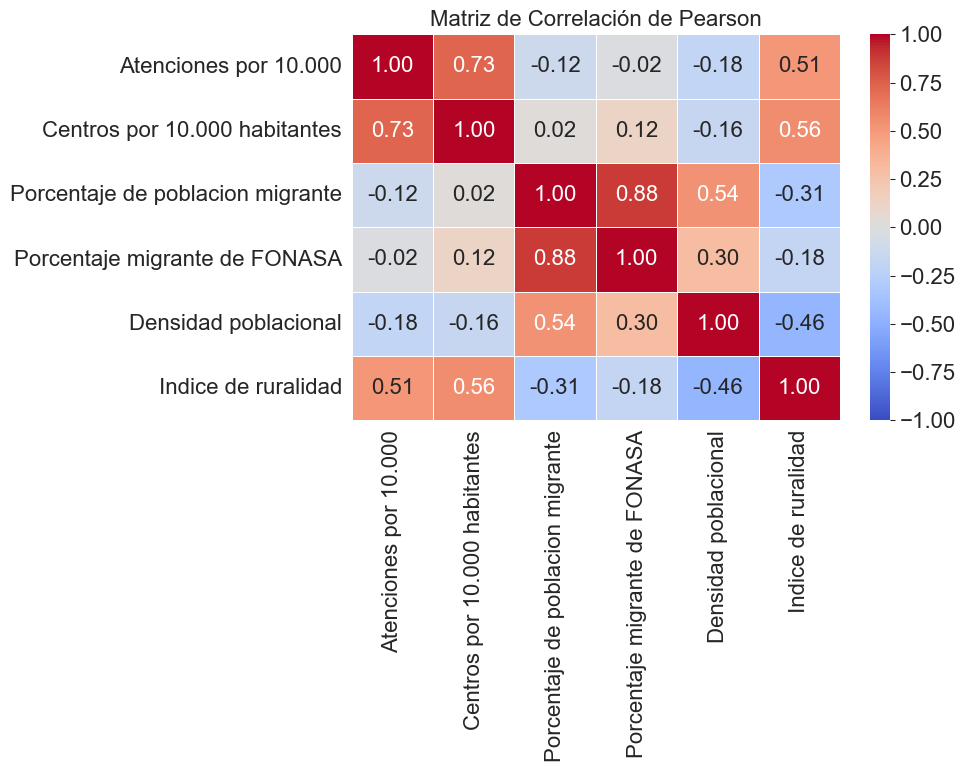

                                  Atenciones por 10.000  \
Atenciones por 10.000                          1.000000   
Centros por 10.000 habitantes                  0.729425   
Porcentaje de poblacion migrante              -0.119241   
Porcentaje migrante de FONASA                 -0.018986   
Densidad poblacional                          -0.183485   
Indice de ruralidad                            0.513544   

                                  Centros por 10.000 habitantes  \
Atenciones por 10.000                                  0.729425   
Centros por 10.000 habitantes                          1.000000   
Porcentaje de poblacion migrante                       0.020103   
Porcentaje migrante de FONASA                          0.117194   
Densidad poblacional                                  -0.160825   
Indice de ruralidad                                    0.556068   

                                  Porcentaje de poblacion migrante  \
Atenciones por 10.000                         

In [30]:
# 1. Seleccionamos solo las variables numéricas que nos interesan
# Incluimos la variable dependiente (tasa_atencion) y las independientes
cols_interes = [
    'Atenciones por 10.000', 
    'Centros por 10.000 habitantes',
    'Porcentaje de poblacion migrante',# % cantidad atenciones migrantes
    'Porcentaje migrante de FONASA', 
    'Densidad poblacional',
    'Indice de ruralidad'    # La incluimos para ver su relación con ruralidad
]
plt.rcParams.update({'font.size': 16})
# 2. Calculamos la matriz de correlación de Pearson
matriz_corr = df_merged[cols_interes].corr(method='pearson')

# 3. Graficamos el Heatmap
plt.figure(figsize=(10, 8))

sns.heatmap(matriz_corr, 
            annot=True,       # Muestra los números en cada celda
            fmt=".2f",        # Formato de 2 decimales
            cmap='coolwarm',  # Colores: Rojo (positivo), Azul (negativo)
            vmin=-1, vmax=1,  # Fijamos la escala de -1 a 1
            linewidths=0.5)   # Líneas blancas entre cuadros

plt.title('Matriz de Correlación de Pearson', fontsize=16)
plt.tight_layout()
# Guardar
plt.savefig(
    "../../figures/pais/pearson.png", 
    dpi=300,                
    bbox_inches='tight'     
)
plt.show()

# Si quieres ver los números en texto plano:
print(matriz_corr)